# REGRESSION MODELS

>**Regression analysis** is a statistical method used to understand and quantify the relationship between two or more variables. It helps businesses estimate one dependent variable based on the values of one or more independent variables. This helps determine how changes in one variable are associated with changes in another, allowing for predictions or understanding the impact of different factors on an outcome. Data collection, preprocessing, and model selection are crucial phases in regression analysis. It can also be used for multiple regression, where multiple independent variables are considered, making it useful in real-world scenarios where various factors influence outcomes.

>

### How to Perform Regression Analysis?

+ **Data collection and preparation:** Gather and clean data, ensuring it meets assumptions like linearity and independence.
+ **Selecting the appropriate regression model:** Choose the correct type of regression (linear, polynomial, logistic, etc.) based on the data and research objectives.
+ **Data analysis and interpretation:** Analyse results, assess model accuracy, and interpret coefficients to draw meaningful conclusions.
+ **Model evaluation and validation:** Test the model's performance using metrics like R-squared, mean-squared error, or cross-validation.

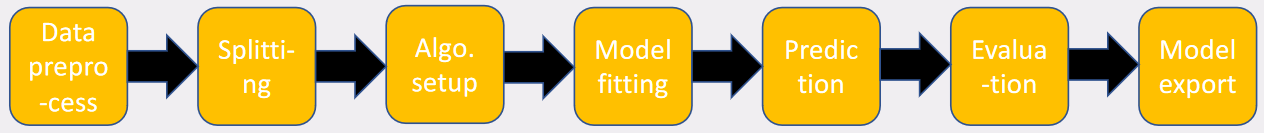

>

### Common Types of Variables in Machine Learning 

***
**Dependent variable (Label)**

is the outcome of a study, such as quarterly sales figures or customer satisfaction ratings, and is the result of the influence of other factors. To identify it, consider whether it's the end result of the analysis, depends on other variables, and is measured after changes have been made.

***
**Independent variables (Features)** 

are factors that can influence or cause changes in the dependent variable. They can be manipulated or observed to observe their impact on the outcome of interest. For instance, adjusting a product's price could affect sales figures. To determine if a variable is independent, consider whether it is controlled or changed, if it precedes the dependent variable in time, and if it's being studied.

## I.  LINEAR REGRESSION

### I.1.   Simple Linear Regression

>**Simple linear regression (SLR)** is a statistical method used to model the relationship between two variables, with one being the independent variable and the other being the dependent variable. It is commonly used in business to predict sales based on advertising expenditure or estimate employee productivity.  In linear regression analysis, a straight line is drawn in the scatter plot. To determine this straight line, linear regression uses the ***method of Ordinary Least Squares (OLS)***. 

The regression line can be described by the following equation: 

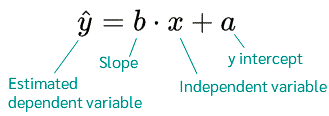   Where: **a =** point of intersection with the y-axis,  **b =** gradient of the straight line, **ŷ** is the respective estimate of the y-value. This means that for each x-value the corresponding y-value is estimated.



In this example, it means that the height of people is used to estimate their weight. 

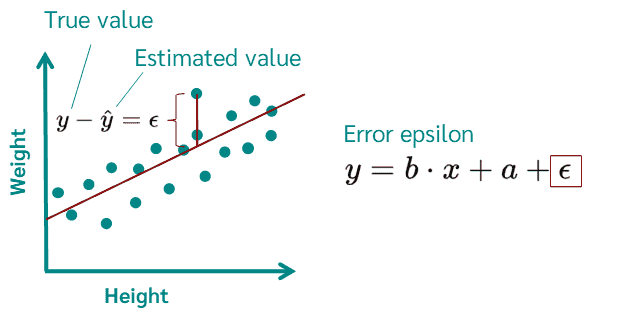 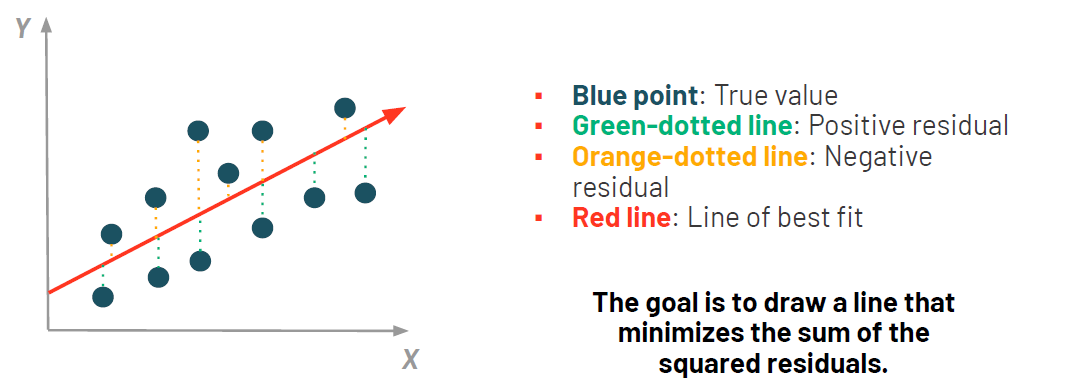

In [1]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8/Contents/Home"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

### I.2.  SLR Implementation

In our demonstration of a SLR, we are going to try predicting the CO2EMISSIONS, according to the ENGINESIZE of vehicles. Meaning that, our Dependant (label) variable is the CO2EMISSION level, and the Independant (feature) variable will be the engine sizes of the different vehicles.

**Step 1: Import Required Libraries and Create SparkSession**

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [92]:
# Create a new Sparksession
spark = SparkSession\
    .builder\
    .appName('Simple_Linear_Regression_Model')\
    .getOrCreate()

25/02/22 14:17:36 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


**Step 2: Load the Data**

In [93]:
path = "/Users/tomdursley/Downloads/FuelConsumption.csv"
path1 = "/Users/tomdursley/Documents/Pyspark Project/Pyspark tables/glassdoor.csv"

Fuel_sparkdf = spark.read.csv(path, header=True, inferSchema=True)

Fuel_sparkdf.show()



+---------+------------+------------+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|MODELYEAR|        MAKE|       MODEL|VEHICLECLASS|ENGINESIZE|CYLINDERS|TRANSMISSION|FUELTYPE|FUELCONSUMPTION_CITY|FUELCONSUMPTION_HWY|FUELCONSUMPTION_COMB|FUELCONSUMPTION_COMB_MPG|CO2EMISSIONS|
+---------+------------+------------+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|     2014|       ACURA|         ILX|     COMPACT|       2.0|        4|         AS5|       Z|                 9.9|                6.7|                 8.5|                      33|         196|
|     2014|       ACURA|         ILX|     COMPACT|       2.4|        4|          M6|       Z|                11.2|                7.7|                 9.6|                      29|         221|
|     2014|       ACURA|  ILX 

**Step 3:Prepare the Data**

checking and dropping NULL values

In [94]:
null_count = Fuel_sparkdf.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in Fuel_sparkdf.columns])

print("the number of null values is: ")

null_count.show()

the number of null values is: 
+---------+----+-----+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|MODELYEAR|MAKE|MODEL|VEHICLECLASS|ENGINESIZE|CYLINDERS|TRANSMISSION|FUELTYPE|FUELCONSUMPTION_CITY|FUELCONSUMPTION_HWY|FUELCONSUMPTION_COMB|FUELCONSUMPTION_COMB_MPG|CO2EMISSIONS|
+---------+----+-----+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|        0|   0|    0|           0|         0|        0|           0|       0|                   0|                  0|                   0|                       0|           0|
+---------+----+-----+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+



Create a subset of our dataset, selecting only the most relevant features for the analysis

In [95]:
Fuel_dfSLR = Fuel_sparkdf.select("MODEL", "ENGINESIZE", "CO2EMISSIONS")

Fuel_dfSLR.show()



+------------+----------+------------+
|       MODEL|ENGINESIZE|CO2EMISSIONS|
+------------+----------+------------+
|         ILX|       2.0|         196|
|         ILX|       2.4|         221|
|  ILX HYBRID|       1.5|         136|
|     MDX 4WD|       3.5|         255|
|     RDX AWD|       3.5|         244|
|         RLX|       3.5|         230|
|          TL|       3.5|         232|
|      TL AWD|       3.7|         255|
|      TL AWD|       3.7|         267|
|         TSX|       2.4|         212|
|         TSX|       2.4|         225|
|         TSX|       3.5|         239|
|         DB9|       5.9|         359|
|      RAPIDE|       5.9|         359|
|  V8 VANTAGE|       4.7|         338|
|  V8 VANTAGE|       4.7|         354|
|V8 VANTAGE S|       4.7|         338|
|V8 VANTAGE S|       4.7|         354|
|    VANQUISH|       5.9|         359|
|          A4|       2.0|         202|
+------------+----------+------------+
only showing top 20 rows



> **Let's explore the correlation between the input and the output variable**

In [96]:
import pandas as pd

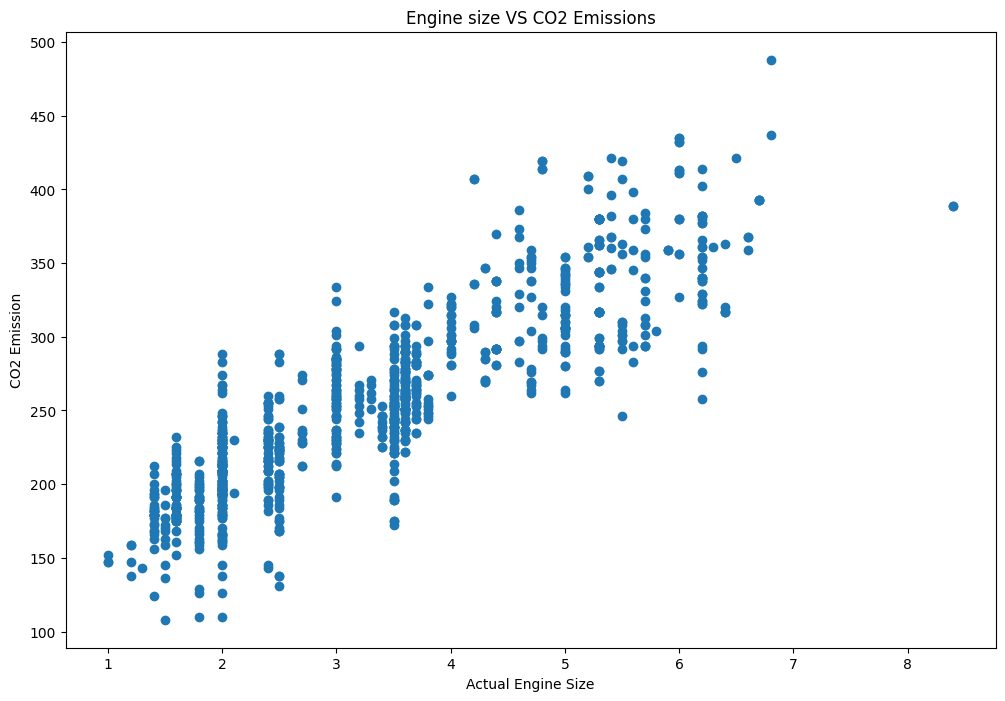

In [97]:
pandas_df = Fuel_dfSLR.toPandas()

pandas_df = Fuel_dfSLR.toPandas()

plt.figure(figsize=(12, 8))

plt.scatter(pandas_df["ENGINESIZE"], pandas_df["CO2EMISSIONS"])

plt.xlabel("Actual Engine Size")
plt.ylabel("CO2 Emission")
plt.title("Engine size VS CO2 Emissions")

plt.show()



**Prepare the data for simple linear regression**

MLlib requires the predictor variables to be in a single features column as a vector.

In [98]:
assembler = VectorAssembler(inputCols=["ENGINESIZE"], outputCol="features")

data = assembler.transform(Fuel_dfSLR)

data.show()


+------------+----------+------------+--------+
|       MODEL|ENGINESIZE|CO2EMISSIONS|features|
+------------+----------+------------+--------+
|         ILX|       2.0|         196|   [2.0]|
|         ILX|       2.4|         221|   [2.4]|
|  ILX HYBRID|       1.5|         136|   [1.5]|
|     MDX 4WD|       3.5|         255|   [3.5]|
|     RDX AWD|       3.5|         244|   [3.5]|
|         RLX|       3.5|         230|   [3.5]|
|          TL|       3.5|         232|   [3.5]|
|      TL AWD|       3.7|         255|   [3.7]|
|      TL AWD|       3.7|         267|   [3.7]|
|         TSX|       2.4|         212|   [2.4]|
|         TSX|       2.4|         225|   [2.4]|
|         TSX|       3.5|         239|   [3.5]|
|         DB9|       5.9|         359|   [5.9]|
|      RAPIDE|       5.9|         359|   [5.9]|
|  V8 VANTAGE|       4.7|         338|   [4.7]|
|  V8 VANTAGE|       4.7|         354|   [4.7]|
|V8 VANTAGE S|       4.7|         338|   [4.7]|
|V8 VANTAGE S|       4.7|         354|  

**Split the data into training and testing sets**

In [99]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)




**Create and train the linear regression model**

In [100]:
SLR = LinearRegression(featuresCol="features", labelCol="CO2EMISSIONS")

LR_MODEL = SLR.fit(train_data)




25/02/22 14:17:55 WARN Instrumentation: [9b9cd06d] regParam is zero, which might cause numerical instability and overfitting.


**Print the model coefficients and intercept**

In [101]:
coef = LR_MODEL.coefficients
intercept = LR_MODEL.intercept

print("The coefficent of this model is:", coef)
print("The intercept of this model is:", intercept)



The coefficent of this model is: [38.70661551318074]
The intercept of this model is: 126.61195395176799


CO2EMISSIONS = 38.7 ENGINESIZE + 126.6

**Make predictions on the test data**

In [102]:
SLR_predictions = LR_MODEL.transform(test_data)

SLR_predictions.show(5)



+-------------------+----------+------------+--------+-----------------+
|              MODEL|ENGINESIZE|CO2EMISSIONS|features|       prediction|
+-------------------+----------+------------+--------+-----------------+
|     1500 4X4 (MDS)|       5.7|         324|   [5.7]|347.2396623768982|
|       1500 4X4 FFV|       3.6|         290|   [3.6]|265.9557697992187|
|           1500 FFV|       3.6|         269|   [3.6]|265.9557697992187|
|200 CONVERTIBLE FFV|       3.6|         230|   [3.6]|265.9557697992187|
|                300|       3.6|         237|   [3.6]|265.9557697992187|
+-------------------+----------+------------+--------+-----------------+
only showing top 5 rows



**APPLICATION:** Choose another relevant input feature that could be used to predict the CO2 Emission, perform a SLR and compare the 1st five predicted values with what we just did.

>

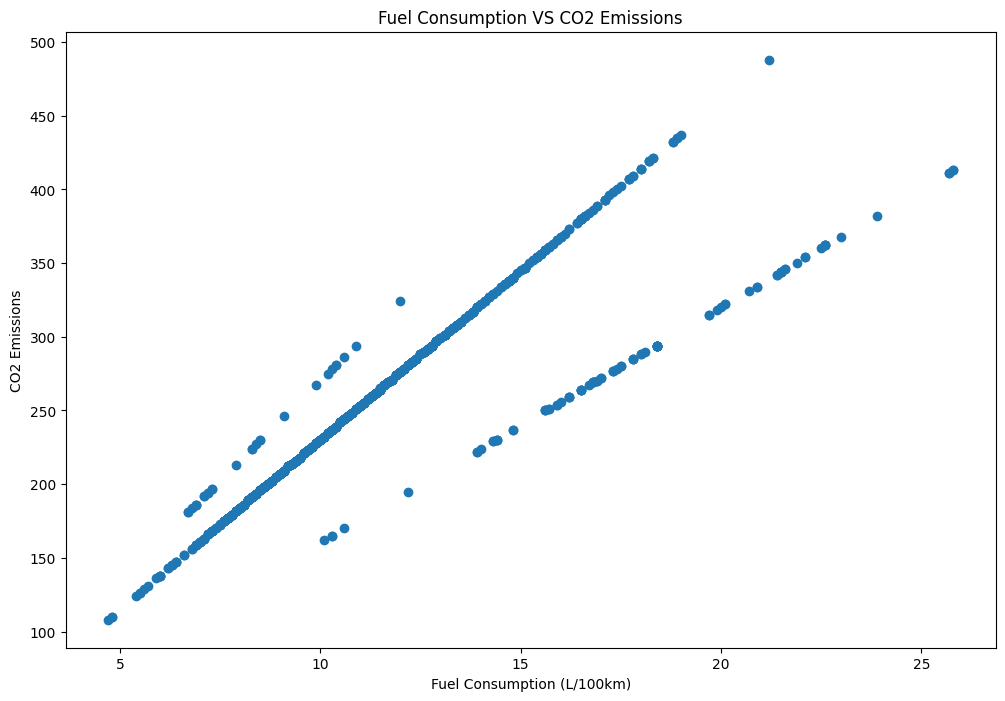

25/02/22 14:18:04 WARN Instrumentation: [7ab4cc25] regParam is zero, which might cause numerical instability and overfitting.


New Model Coefficient: [16.175468095279694]
New Model Intercept: 68.98811975445093
Predictions using Engine Size:
+------------+-----------------+
|CO2EMISSIONS|       prediction|
+------------+-----------------+
|         324|347.2396623768982|
|         290|265.9557697992187|
|         269|265.9557697992187|
|         230|265.9557697992187|
|         237|265.9557697992187|
+------------+-----------------+
only showing top 5 rows

Predictions using Fuel Consumption:
+------------+------------------+
|CO2EMISSIONS|        prediction|
+------------+------------------+
|         324| 297.0622198978946|
|         285|356.91145185042944|
|         274| 261.4761900882793|
|         242| 238.8305347548877|
|         237| 235.5954411358318|
+------------+------------------+
only showing top 5 rows



In [103]:
# Select the new feature along with CO2 Emissions
Fuel_dfSLR2 = Fuel_sparkdf.select("MODEL", "FUELCONSUMPTION_COMB", "CO2EMISSIONS")

# Convert to Pandas for visualization
pandas_df2 = Fuel_dfSLR2.toPandas()

# Scatter Plot for Fuel Consumption vs CO2 Emissions
plt.figure(figsize=(12, 8))
plt.scatter(pandas_df2["FUELCONSUMPTION_COMB"], pandas_df2["CO2EMISSIONS"])
plt.xlabel("Fuel Consumption (L/100km)")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption VS CO2 Emissions")
plt.show()

# Prepare data for Linear Regression
assembler2 = VectorAssembler(inputCols=["FUELCONSUMPTION_COMB"], outputCol="features")
data2 = assembler2.transform(Fuel_dfSLR2)

# Train-Test Split
train_data2, test_data2 = data2.randomSplit([0.8, 0.2], seed=42)

# Train the model
SLR2 = LinearRegression(featuresCol="features", labelCol="CO2EMISSIONS")
LR_MODEL2 = SLR2.fit(train_data2)

# Print Model Parameters
print("New Model Coefficient:", LR_MODEL2.coefficients)
print("New Model Intercept:", LR_MODEL2.intercept)

# Predictions
SLR_predictions2 = LR_MODEL2.transform(test_data2)

# Show first 5 predictions for comparison
print("Predictions using Engine Size:")
SLR_predictions.select("CO2EMISSIONS", "prediction").show(5)

print("Predictions using Fuel Consumption:")
SLR_predictions2.select("CO2EMISSIONS", "prediction").show(5)


HOMEWORK:  select 3 relevant columns as input features to predict the CO2 emissions

### I.3. Multiple Linear Regression

>Multiple linear regression involves considering multiple independent variables to estimate a dependent variable, while the independent variables are used for prediction, unlike simple linear regression which considers only two variables.

>Multiple linear regression is frequently used in empirical social research as well as in market research. In both areas it is of interest to find out what influence different factors have on a variable. For example, what determinants influence a person's health or purchasing behavior? 

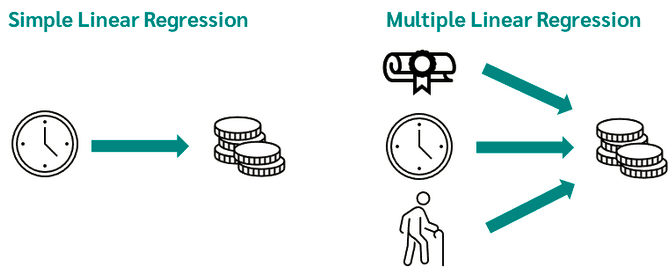


***
**Marketing example:**

For a video streaming service you should predict how many times a month a person streams videos. For this you get a record of user's data (age, income, gender, ...).
***

**Medical example:**

You want to find out which factors have an influence on the cholesterol level of patients. For this purpose, you analyze a patient data set with cholesterol level, age, hours of sport per week and so on.
***



>

The equation necessary for the calculation of a multiple regression is obtained with k dependent variables as: 

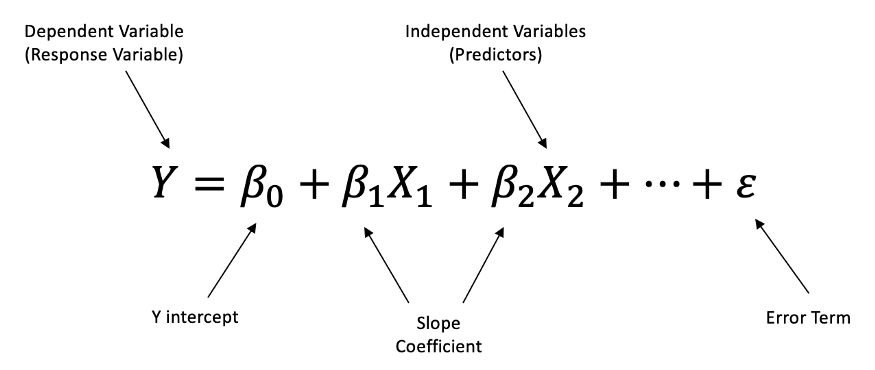


+ **y =** the predicted value of the dependent variable
+ **B_0 =** the y-intercept (value of y when all other parameters are set to 0)
+ **B_1X_1 =** the regression coefficient (B_1) of the first independent variable (X_1) (a.k.a. the effect that increasing the value of the independent variable has on the predicted y value)
+ **… =** do the same for however many independent variables you are testing
+ **B_nX_n =** the regression coefficient of the last independent variable
+ **\epsilon =** model error (a.k.a. how much variation there is in our estimate of y)


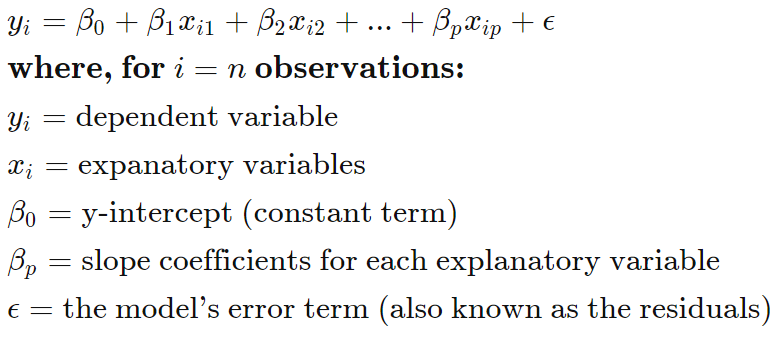

In [76]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8/Contents/Home"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

**Step 1:** Load Data and Initialize Spark Session

In [78]:
# Create SparkSession
spark = SparkSession \
    .builder \
        .appName("MultipleLinearRegression") \
            .getOrCreate()

25/02/22 14:07:43 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


**Step 2:** Data Preparation

+ **Select Relevant Columns:** We will filter only the relevant columns for the regression model.
+ **Handle Missing Values:** We gonna drop rows or fill missing values in predictors or input columns.
+ **Assemble Features:** We'll combine predictors into a single features vector using VectorAssembler.

In [79]:
path = "/Users/tomdursley/Downloads/FuelConsumption.csv"

Fuel_sparkdf = spark.read.csv(path, header=True, inferSchema=True)

Fuel_sparkdf.show(5)

+---------+-----+----------+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|MODELYEAR| MAKE|     MODEL|VEHICLECLASS|ENGINESIZE|CYLINDERS|TRANSMISSION|FUELTYPE|FUELCONSUMPTION_CITY|FUELCONSUMPTION_HWY|FUELCONSUMPTION_COMB|FUELCONSUMPTION_COMB_MPG|CO2EMISSIONS|
+---------+-----+----------+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|     2014|ACURA|       ILX|     COMPACT|       2.0|        4|         AS5|       Z|                 9.9|                6.7|                 8.5|                      33|         196|
|     2014|ACURA|       ILX|     COMPACT|       2.4|        4|          M6|       Z|                11.2|                7.7|                 9.6|                      29|         221|
|     2014|ACURA|ILX HYBRID|     COMPACT|       1.5|        4|         AV7|

In [80]:
# Select relevant features for predicting CO2EMISSIONS

#ENGINESIZE, FUELCONSUMPTION_COMB, CO2EMISSIONS, CYLINDERS

Fuel_dfMLR = Fuel_sparkdf.select("FUELCONSUMPTION_COMB", "ENGINESIZE", "CO2EMISSIONS", "CYLINDERS")

Fuel_dfMLR.show(5)


+--------------------+----------+------------+---------+
|FUELCONSUMPTION_COMB|ENGINESIZE|CO2EMISSIONS|CYLINDERS|
+--------------------+----------+------------+---------+
|                 8.5|       2.0|         196|        4|
|                 9.6|       2.4|         221|        4|
|                 5.9|       1.5|         136|        4|
|                11.1|       3.5|         255|        6|
|                10.6|       3.5|         244|        6|
+--------------------+----------+------------+---------+
only showing top 5 rows



In [81]:
# Handle missing values (if any)

null_count = Fuel_dfMLR.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in Fuel_dfMLR.columns])

print("the number of null values is: ")

null_count.show()



the number of null values is: 
+--------------------+----------+------------+---------+
|FUELCONSUMPTION_COMB|ENGINESIZE|CO2EMISSIONS|CYLINDERS|
+--------------------+----------+------------+---------+
|                   0|         0|           0|        0|
+--------------------+----------+------------+---------+



In [114]:
assembler = VectorAssembler(inputCols=["FUELCONSUMPTION_COMB", "ENGINESIZE","CYLINDERS"], outputCol="features")

assembled_data = assembler.transform(Fuel_dfMLR)

assembled_data.show(5, truncate=False)


+--------------------+----------+------------+---------+--------------+
|FUELCONSUMPTION_COMB|ENGINESIZE|CO2EMISSIONS|CYLINDERS|features      |
+--------------------+----------+------------+---------+--------------+
|8.5                 |2.0       |196         |4        |[8.5,2.0,4.0] |
|9.6                 |2.4       |221         |4        |[9.6,2.4,4.0] |
|5.9                 |1.5       |136         |4        |[5.9,1.5,4.0] |
|11.1                |3.5       |255         |6        |[11.1,3.5,6.0]|
|10.6                |3.5       |244         |6        |[10.6,3.5,6.0]|
+--------------------+----------+------------+---------+--------------+
only showing top 5 rows



**Step 3:** Train-Test Split

In [115]:
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)



**Step 4:** Train the Multiple Linear Regression Model

In [116]:

MLR = LinearRegression(featuresCol="features", labelCol="CO2EMISSIONS")

MLR_MODEL = MLR.fit(train_data)




25/02/22 14:32:40 WARN Instrumentation: [d2b72d7c] regParam is zero, which might cause numerical instability and overfitting.


In [117]:
print("Coefficients: ", MLR_MODEL.coefficients)
print("Intercept: ", MLR_MODEL.intercept)

Coefficients:  [9.583022473094907,11.457425902199605,7.164466396524107]
Intercept:  65.61437182897156


**EXERCISE:** Use the intercept and the different coefficients, to write the equation of the multiple regression line of your output feature

CO2EMISSIONS = 52.1313 + (10.7770 × FUELCONSUMPTION_COMB) + (13.7017 × CYLINDERS)

**Step 5:** Make Predictions

In [118]:
MLR_predictions = MLR_MODEL.transform(test_data)

MLR_predictions.show(5)

+--------------------+----------+------------+---------+-------------+------------------+
|FUELCONSUMPTION_COMB|ENGINESIZE|CO2EMISSIONS|CYLINDERS|     features|        prediction|
+--------------------+----------+------------+---------+-------------+------------------+
|                 4.8|       2.0|         110|        4|[4.8,2.0,4.0]|163.18559709032274|
|                 5.6|       1.8|         129|        4|[5.6,1.8,4.0]|168.56052988835876|
|                 5.9|       1.5|         136|        4|[5.9,1.5,4.0]|167.99820885962737|
|                 6.2|       1.3|         143|        4|[6.2,1.3,4.0]| 168.5816304211159|
|                 6.4|       1.0|         147|        3|[6.4,1.0,3.0]|159.89654074855088|
+--------------------+----------+------------+---------+-------------+------------------+
only showing top 5 rows



MLR evaluation

In [119]:
MLR_evaluator_r2 = RegressionEvaluator(labelCol="CO2EMISSIONS",
                                       predictionCol="prediction",
                                       metricName="r2")


MLR_r2 = MLR_evaluator_r2.evaluate(MLR_predictions)

print("The Coefficient of Determination is:", MLR_r2)

The Coefficient of Determination is: 0.83913128544792


In [120]:
MLR_evaluator_rmse = RegressionEvaluator(labelCol="CO2EMISSIONS",
                                       predictionCol="prediction",
                                       metricName="rmse")


MLR_rmse = MLR_evaluator_rmse.evaluate(MLR_predictions)

print("The Coefficient of Determination is:", MLR_rmse)

The Coefficient of Determination is: 26.853368115055336


SLR Evaluation

In [121]:
SLR_evaluator_r2 = RegressionEvaluator(labelCol="CO2EMISSIONS",
                                       predictionCol="prediction",
                                       metricName="r2")


SLR_r2 = SLR_evaluator_r2.evaluate(SLR_predictions)

print("The Coefficient of Determination is:", SLR_r2)

The Coefficient of Determination is: 0.7761671330659544


In [122]:
SLR_evaluator_rmse = RegressionEvaluator(labelCol="CO2EMISSIONS",
                                       predictionCol="prediction",
                                       metricName="rmse")


SLR_rmse = SLR_evaluator_rmse.evaluate(SLR_predictions)

print("The Coefficient of Determination is:", SLR_rmse)

The Coefficient of Determination is: 31.694488700731863


In [127]:
print(f"The difference between SLR R2 and MLR R2 is: {round(SLR_r2, 4)} VS {round(MLR_r2, 4)}")
print(f"The difference between SLR RMSE and MLR RMSE is: {round(SLR_rmse, 2)} VS {round(MLR_rmse, 2)}")

The difference between SLR R2 and MLR R2 is: 0.7762 VS 0.8391
The difference between SLR RMSE and MLR RMSE is: 31.69 VS 26.85


In [26]:
spark.stop()

**EXERCISE:** What can you say about the predicted CO2 emissions when 1 input feature is used, compared to when many factors are involved?

I would say that the data in the multiple linear regression model is more accurate as it takes in more inputs in to the equation. This is more accurate as lots of other features may have other influences on that data.

# LINEAR REGRESSION MODEL WITH NON-NUMERIC FEATURES

**Types of non-numeric features:**

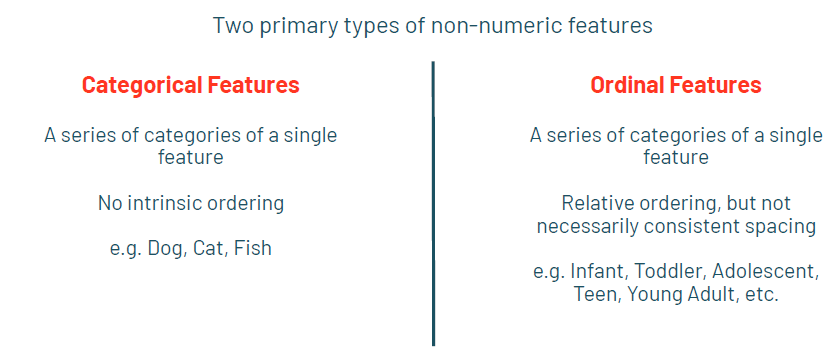

**Problematic:**

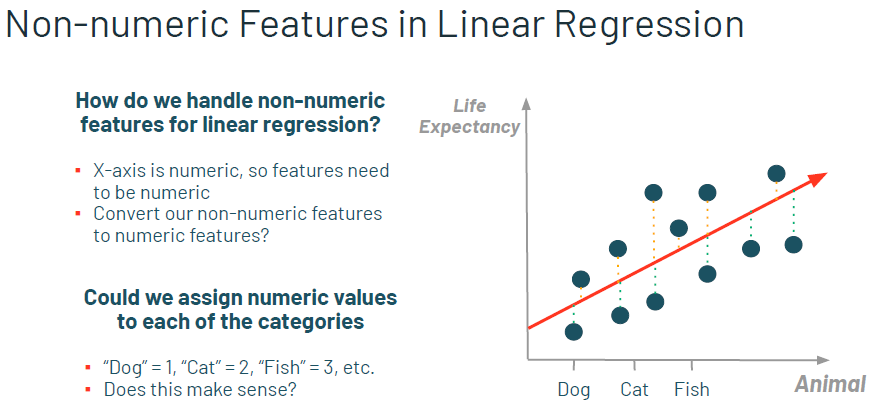

This implies that 1 cat equals 2 dogs!

**Getting all the useful libraries**

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, OneHotEncoder, VectorAssembler, StringIndexer, IDF,HashingTF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator,TrainValidationSplit, ParamGridBuilder




**Step 1: Data Preparation**

First, we'll create a Sparksession and select only the relevant column for our analysis, which is the "ReviewId" and "Feedback" column:

In [2]:

# Create a SparkSession
spark = SparkSession \
    .builder \
        .appName("GlassdoorAnalysis") \
            .getOrCreate()


25/02/22 11:02:09 WARN Utils: Your hostname, Toms-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.180.174.193 instead (on interface en0)
25/02/22 11:02:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/22 11:02:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/22 11:02:11 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


**Step 1: Relevant Columns**

+ **Age:** Older employees might have higher income due to seniority.
+ **JobLevel:** Higher job levels often lead to higher income.
+ **Education:** Higher education levels could correlate with higher pay.
+ **EducationField:** May influence earnings (e.g., STEM vs. Arts).
+ **JobRole:** Different roles may have different pay scales.
+ **MaritalStatus:** Could indicate financial stability or experience.
+ **DistanceFromHome:** Employees closer to work may save costs but are less likely to have inflated salaries.
+ **OverTime:** Employees who work overtime may earn more.

In [3]:
path1 = "/Users/tomdursley/Documents/Pyspark Project/Pyspark tables/glassdoor.csv"

Glass_sparkdf = spark.read.csv(path1, header=True, inferSchema=True)

Glass_sparkdf.show(5)




25/02/22 11:02:22 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+--------------------+-------------+
|ReviewId|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkL

In [4]:
relevant_columns = ["Age", "JobLevel", "Education", "EducationField", "JobRole", 
    "MaritalStatus", "DistanceFromHome", "OverTime", "MonthlyIncome"]



**Step 3: Prepare the features**

In [5]:
# Divide the subset of data into categorical and numerical
categorical_features = ["Education", "EducationField", "JobRole", "MaritalStatus", "OverTime"]
numeric_features = ["Age", "JobLevel", "DistanceFromHome"]


**Step 3: Encode categorical features**

+ ***StringIndexer*** is a feature transformer that converts categorical string variables into numerical indices, making it useful for handling categorical features in machine learning algorithms that require numerical input. It is used when preparing data for non-natively handling algorithms like regression or support vector machines, and to maintain an ordinal relationship among categories.
+ ***OneHotEncoder*** is a feature transformer that converts categorical indices into a sparse vector, representing each category as a one-hot encoded vector. This helps avoid the ordinality issue introduced by StringIndexer when categories do not have an ordinal relationship. It is used after converting categorical variables to numerical indices, for algorithms that require or perform better with one-hot encoded features, and when categorical variables do not have an inherent ordinal relationship.



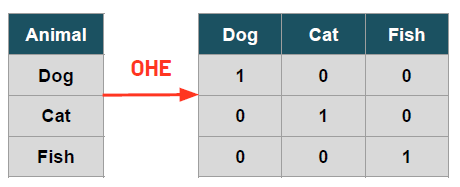

In [6]:
stages = []

for cat_feature in categorical_features:
    string_indexer = StringIndexer(inputCol = cat_feature, outputCol = f"{cat_feature} Index")
    encoder = OneHotEncoder(inputCol= f"{cat_feature} Index", outputCol= f"{cat_feature} Vec")
    stages += [string_indexer, encoder]
    

In [7]:
all_features = numeric_features + [f"{cat_feature} Vec" for cat in categorical_features]

assembler = VectorAssembler(inputCols=all_features, outputCol="features")

stages += [assembler]

**Step 4: Create and set up the pipeline**

In [8]:
pipeline = Pipeline(stages = stages)



**Step 5: Build the pipeline model**

In [9]:
transformed_data = pipeline.fit(Glass_sparkdf).transform(Glass_sparkdf)

transformed_data.show(5)



+--------+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+--------------------+-------------+---------------+-------------+--------------------+------------------+-------------+-------------+-------------------+-----------------+--------------+-------------+--------------------+
|ReviewId|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|Month

**Step 6: Prepare final dataset for modeling**

In [62]:

final_data = transformed_data.select("features", "MonthlyIncome")



**Step 7: Split the data into training and testing sets**

In [63]:
train_data, test_data = final_data.randomSplit((0.8, 0.2), seed=42)



**Step 8: Create and train the Linear Regression model**

In [64]:

linear_reg = LinearRegression(featuresCol="features", labelCol="MonthlyIncome")

lr_model = linear_reg.fit(train_data)





25/02/22 13:53:58 WARN Instrumentation: [9d777aeb] regParam is zero, which might cause numerical instability and overfitting.
25/02/22 13:53:58 WARN Instrumentation: [9d777aeb] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


**Step 9: Make predictions on the test data**

In [66]:
linear_prediction = lr_model.transform(test_data)

linear_prediction.select("MonthlyIncome", "prediction").show(10)

+-------------+------------------+
|MonthlyIncome|        prediction|
+-------------+------------------+
|         1859|2491.0667829297045|
|         2323|2502.8907261467575|
|         2600| 2478.100409412079|
|         4171|  6510.59415029094|
|         2886| 2525.396182280292|
|         1118|2314.1072748852375|
|         2340| 2313.536059734952|
|         2394|2399.7309531560404|
|         2319| 2596.911056732898|
|         2800| 2596.911056732898|
+-------------+------------------+
only showing top 10 rows



MODEL EVALUATION

In [67]:
linear_evaluator_r2 = RegressionEvaluator(labelCol="MonthlyIncome",
                                       predictionCol="prediction",
                                       metricName="r2")


linear_r2 = linear_evaluator_r2.evaluate(linear_prediction)

print("The Coefficient of Determination is:", linear_r2)


The Coefficient of Determination is: 0.9373411046624205


TASK: Change the metric to RMSE, interpret

In [68]:
linear_evaluator_rmse = RegressionEvaluator(labelCol="MonthlyIncome",
                                       predictionCol="prediction",
                                       metricName="rmse")


linear_rmse = linear_evaluator_rmse.evaluate(linear_prediction)

print("The Route Mean Squared is:", linear_rmse)

The Route Mean Squared is: 1244.8103474880486


MODEL TUNING

In [69]:
paragrid = ParamGridBuilder()\
    .addGrid(linear_reg.regParam, [0.01, 0.1, 1.0])\
    .addGrid(linear_reg.elasticNetParam, [0.0, 0.5, 1.0])\
    .build()
        
crossVal = CrossValidator(estimator = linear_reg,
                          estimatorParamMaps = paragrid,
                          evaluator = linear_evaluator_r2,
                          numFolds = 5)

cvModel = crossVal.fit(train_data)

R2 = linear_evaluator_r2.evaluate(cvModel.transform(test_data))

print(f"The optmised R2 score is: {R2}")

The optmised R2 score is: 0.9373597158381867


In [70]:
print((R2-linear_r2)*100)

0.0018611175766181098


In [71]:
paragrid = ParamGridBuilder()\
    .addGrid(linear_reg.regParam, [0.01, 0.1, 1.0])\
    .addGrid(linear_reg.elasticNetParam, [0.0, 0.5, 1.0])\
    .build()
        
crossVal = CrossValidator(estimator = linear_reg,
                          estimatorParamMaps = paragrid,
                          evaluator = linear_evaluator_rmse,
                          numFolds = 5)

cvModel = crossVal.fit(train_data)

RMSE = linear_evaluator_rmse.evaluate(cvModel.transform(test_data))

print(f"The optmised RMSE score is: {RMSE}")

The optmised RMSE score is: 1244.6254646823527


In [72]:
print((RMSE-linear_rmse)/linear_rmse)

-0.00014852287022596548


Train-validation split tuning

In [74]:
train_data, validation_data = final_data.randomSplit([0.8, 0.2], seed=42)

paragrid = ParamGridBuilder()\
    .addGrid(linear_reg.regParam, [0.01, 0.1, 1.0])\
    .addGrid(linear_reg.elasticNetParam, [0.0, 0.5, 1.0])\
    .build()
    
tvs = TrainValidationSplit(estimator=linear_reg,
                           estimatorParamMaps = paragrid,
                           evaluator = linear_evaluator_r2,
                           trainRatio = 0.8)  

tvsModel = tvs.fit(train_data)

r2_tvs = linear_evaluator_r2.evaluate(tvsModel.transform(validation_data))

print(f"The optimised R2 score using the TVS is: {r2_tvs}")
    

The optimised R2 score using the TVS is: 0.937331219573615


In [75]:
train_data, validation_data = final_data.randomSplit([0.8, 0.2], seed=42)

paragrid = ParamGridBuilder()\
    .addGrid(linear_reg.regParam, [0.01, 0.1, 1.0])\
    .addGrid(linear_reg.elasticNetParam, [0.0, 0.5, 1.0])\
    .build()
    
tvs = TrainValidationSplit(estimator=linear_reg,
                           estimatorParamMaps = paragrid,
                           evaluator = linear_evaluator_rmse,
                           trainRatio = 0.8)  

tvsModel = tvs.fit(train_data)

rmse_tvs = linear_evaluator_rmse.evaluate(tvsModel.transform(validation_data))

print(f"The optimised RMSE score using the TVS is: {rmse_tvs}")

The optimised RMSE score using the TVS is: 1244.908534469244
